# 🏀 NBA Team Points Prediction Model
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline

In [16]:
%load_ext autoreload
%autoreload 2
from data.api_fetcher import ApiFetcher

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✨ Introduction

-- todo --


## 📈🔗 Correlation and Covariation exploration 

In [17]:
%reload_ext autoreload
api = ApiFetcher()
df = api.get_numeric_dataframe()

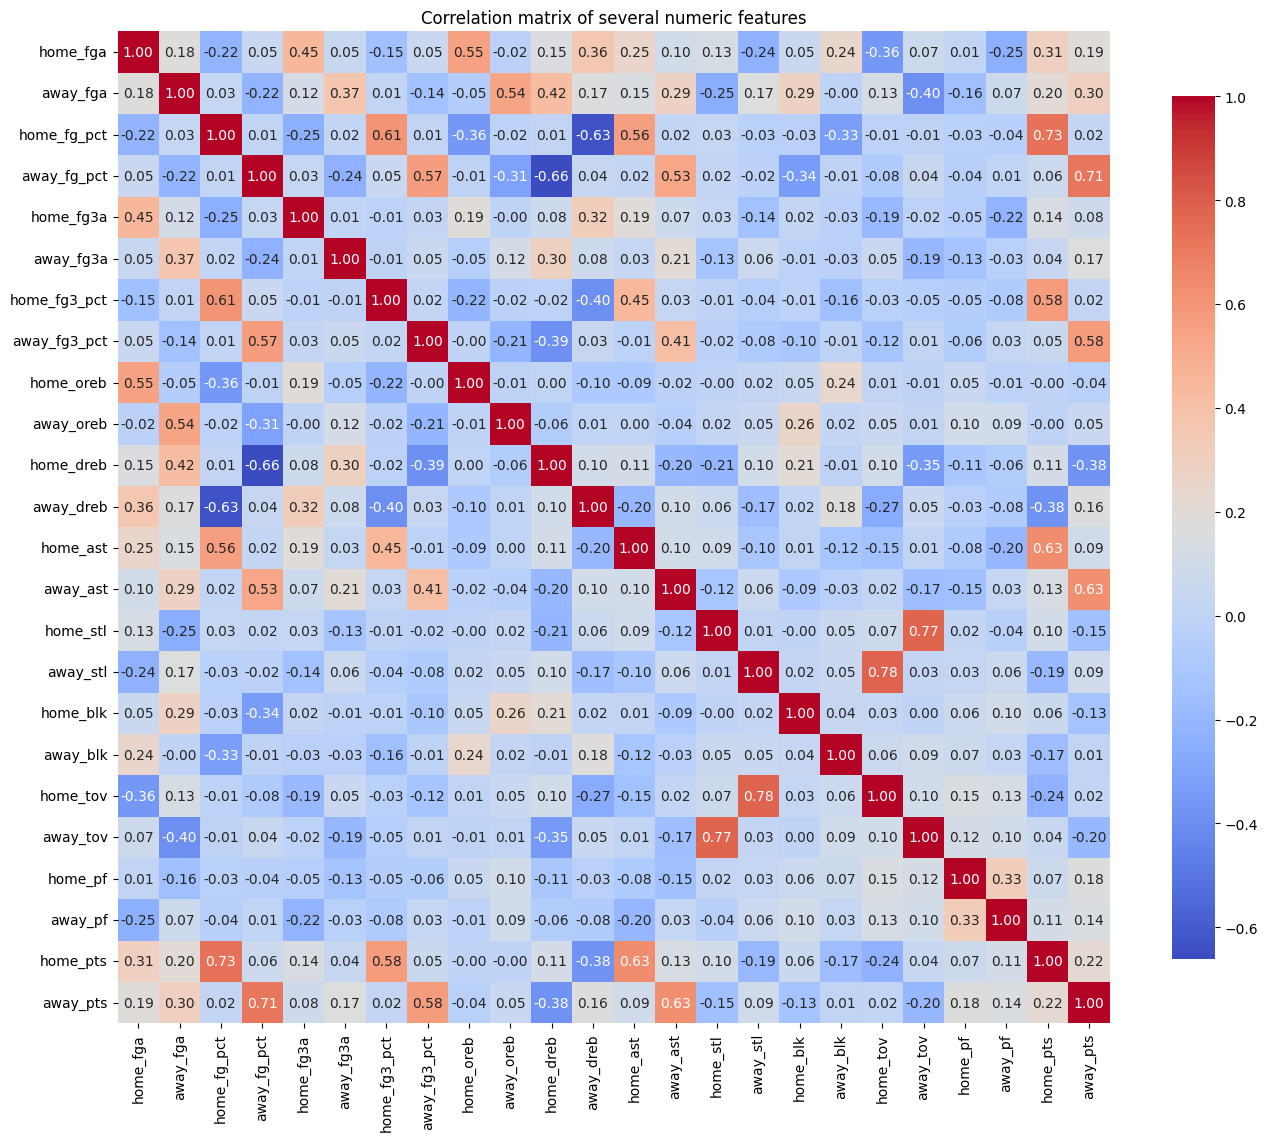

In [27]:
plt.figure(figsize=(16, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of several numeric features")
plt.show();

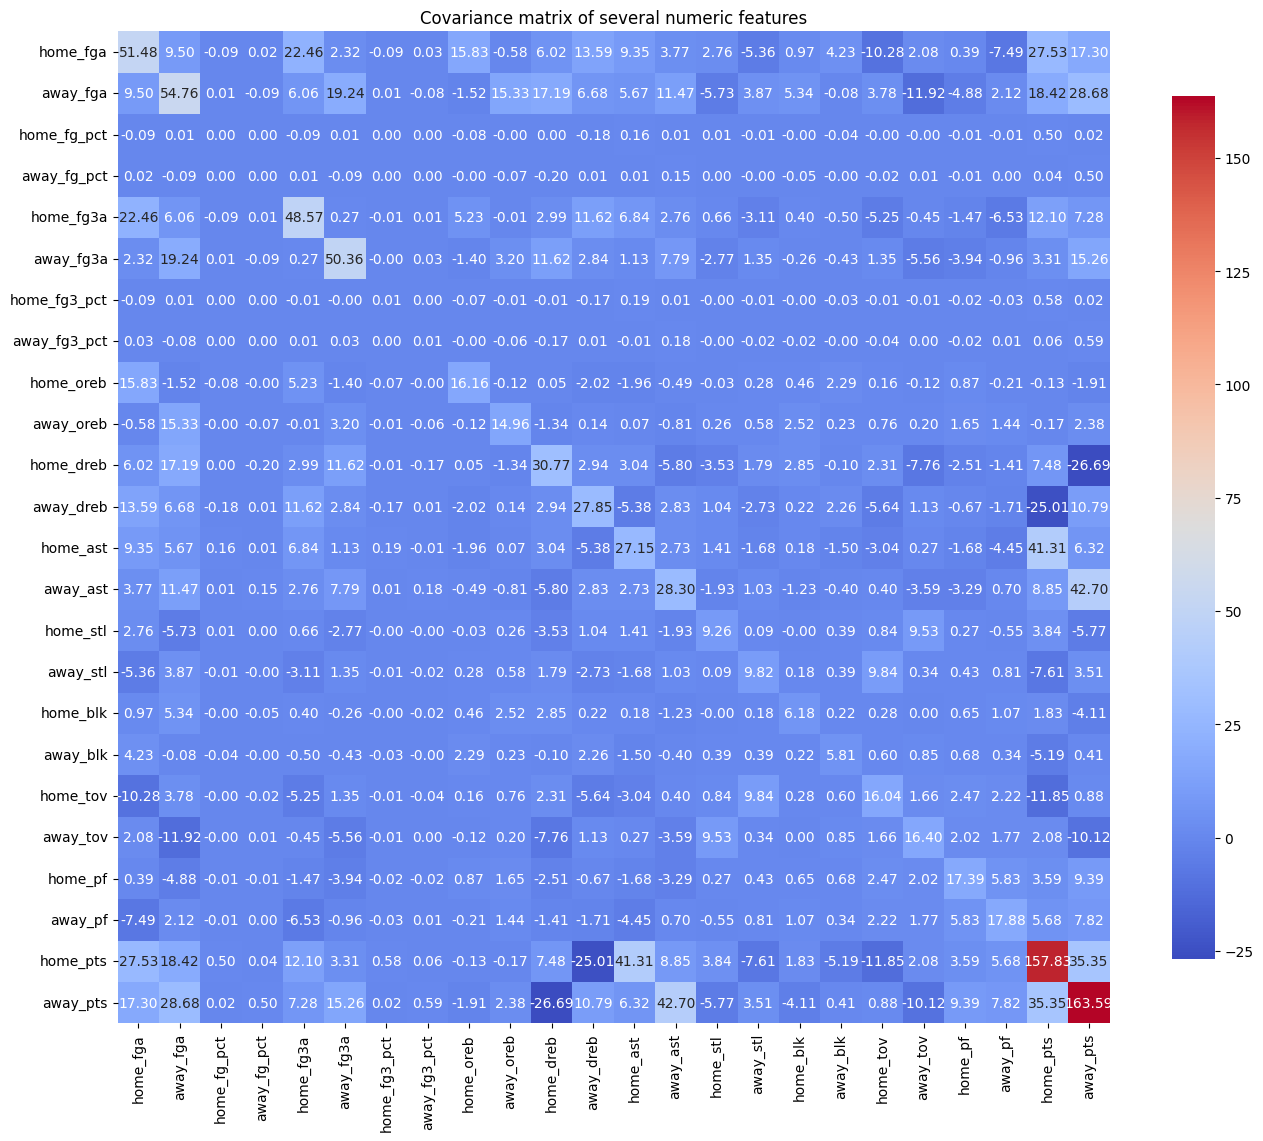

In [ ]:
covariance_matrix = df.cov()
plt.figure(figsize=(16, 16))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Covariance matrix of several numeric features")
plt.show();

## Sandbox
-- na razie do testowania api --